**AUTHOR : ARYAN TIWARI** 

# DevHack ‘22

# Machine Learning :-

**Glass Prediction :
Build an ml model , it should predict which type of glass .** 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET



In [2]:
data=pd.read_csv("../input/glass/glass.csv")


In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


* **RI**: Refractive index
 
* **Na**: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
 
* **Mg**: Magnesium
 
* **Al**: Aluminum

* **Si**: Silicon
 
* **K**: Potassium

* **Ca**: Calcium
 
* **Ba**: Barium

* **Fe**: Iron

* **Type of glass**: (class attribute)

1. Building Windows float processed
1. Building Windows non-float processed
1. Vehicle Windows float processed
1. Vehicle Windows non-float processed
1. Containers
1. Tableware
1. Headlamps
 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.shape    #214 rows and 10 columns in dataset

(214, 10)

In [7]:
data.value_counts()

RI       Na     Mg    Al    Si     K     Ca     Ba    Fe    Type
1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.00  0.00  1       2
1.51115  17.38  0.00  0.34  75.41  0.00  6.65   0.00  0.00  6       1
1.51848  13.64  3.87  1.27  71.96  0.54  8.32   0.00  0.32  2       1
1.51831  14.39  0.00  1.82  72.86  1.41  6.47   2.88  0.00  7       1
1.51832  13.33  3.34  1.54  72.14  0.56  8.99   0.00  0.00  3       1
                                                                   ..
1.51707  13.48  3.48  1.71  72.52  0.62  7.99   0.00  0.00  2       1
1.51708  13.72  3.68  1.81  72.06  0.64  7.88   0.00  0.00  2       1
1.51709  13.00  3.47  1.79  72.72  0.66  8.18   0.00  0.00  2       1
1.51711  12.89  3.62  1.57  72.96  0.61  8.11   0.00  0.00  2       1
1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24  2       1
Length: 213, dtype: int64

In [8]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [9]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Checking Null Values



In [10]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
data.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

# Exploratory Data Analysis

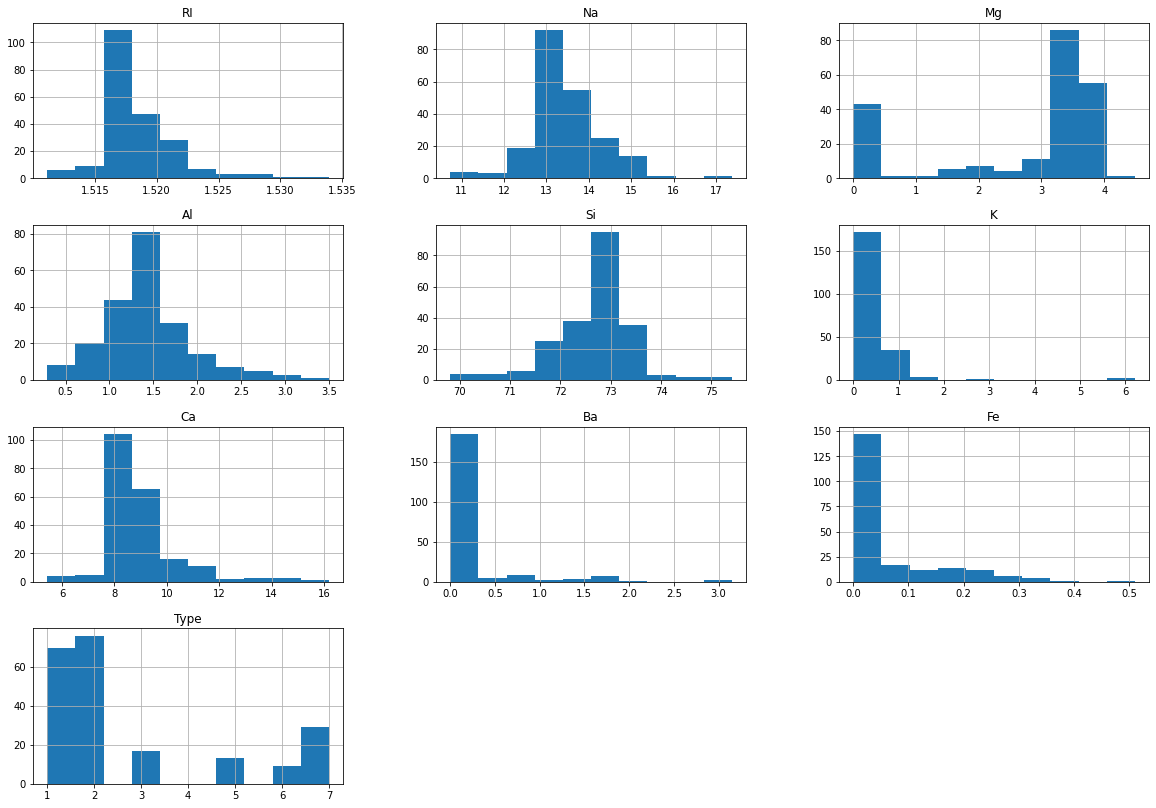

In [12]:
data.hist(figsize=(20,14))
plt.show()


<AxesSubplot:>

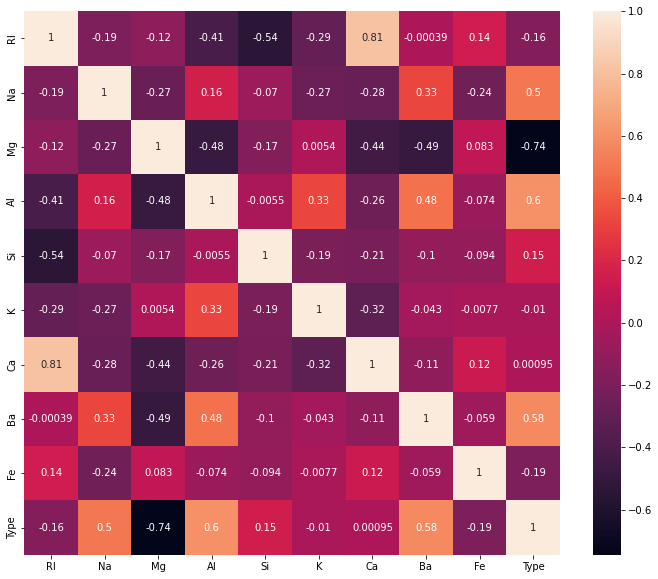

In [13]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)


In [14]:
data["Type"].value_counts()


2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

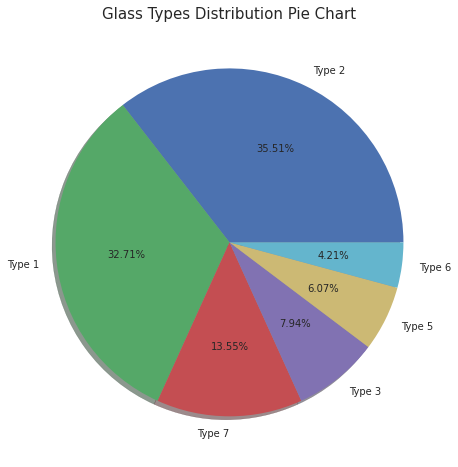

In [15]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10,8))

plt.pie(x=data["Type"].value_counts(), 
        labels=["Type 2", "Type 1", "Type 7", "Type 3", "Type 5", "Type 6"],
        shadow = True, 
        autopct="%1.2f%%", 
        )
plt.title("Glass Types Distribution Pie Chart",fontsize=15)
plt.show()


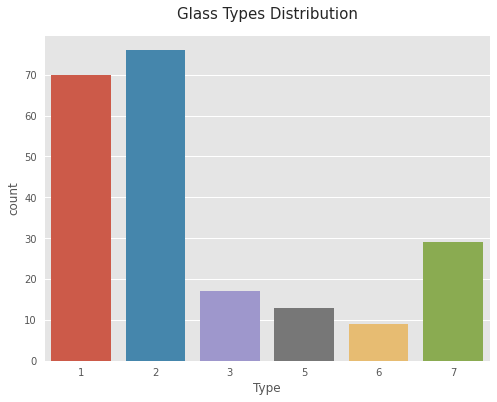

In [16]:
plt.style.use("ggplot")
fig, ax =plt.subplots(figsize=(8,6)) 

sns.countplot(x = data["Type"]);
plt.title("Glass Types Distribution",fontsize=15, y=1.03);


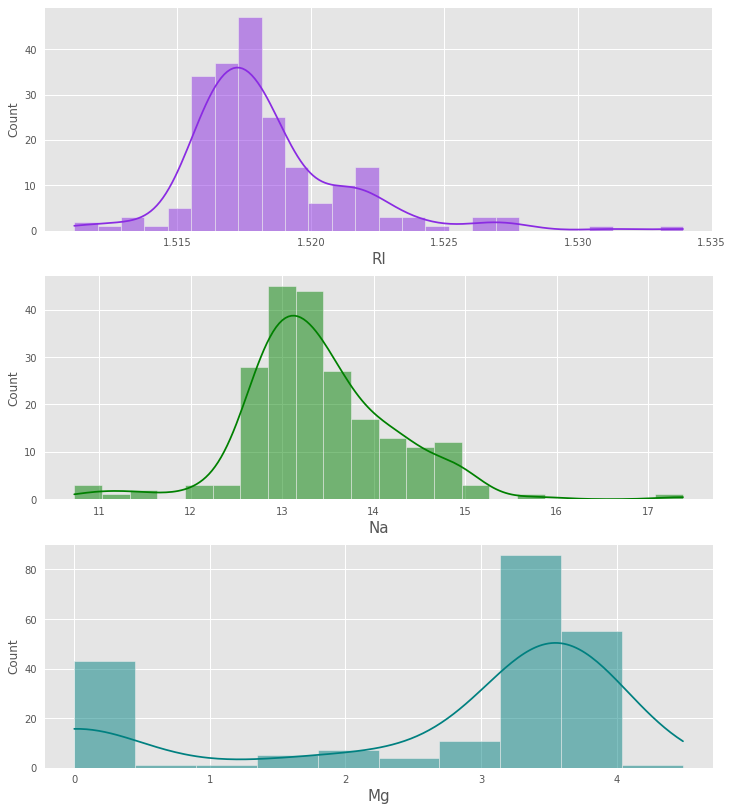

In [17]:
plt.style.use("ggplot")
fig, ax =plt.subplots(3,1, figsize=(12,14)) 


sns.histplot(x = data["RI"], kde=True, ax=ax[0], color="blueviolet");
ax[0].set_xlabel("RI",fontsize=15);

sns.histplot(x = data["Na"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Na",fontsize=15);

sns.histplot(x = data["Mg"], kde=True, ax=ax[2], color="teal");
ax[2].set_xlabel("Mg",fontsize=15);


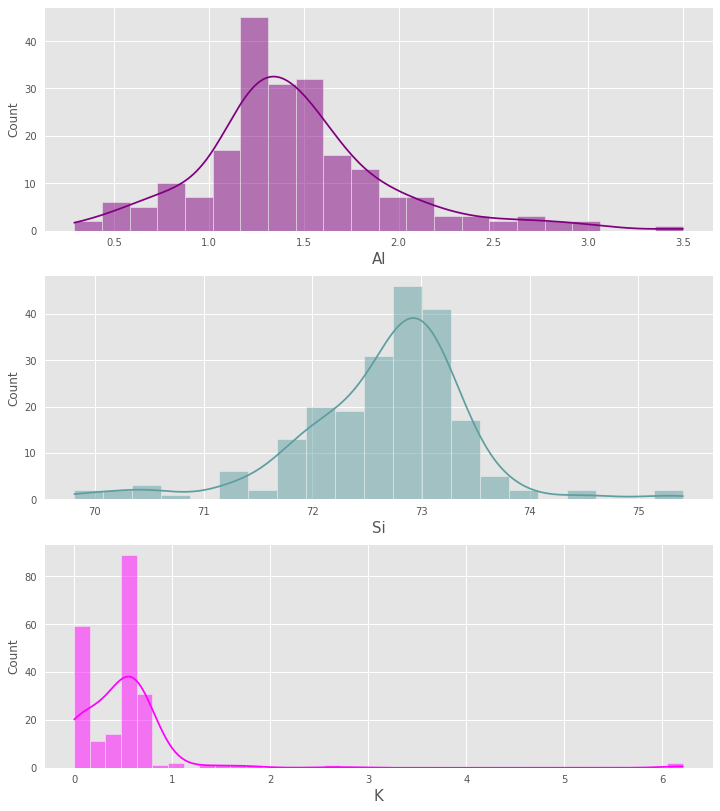

In [18]:
plt.style.use("ggplot")
fig, ax =plt.subplots(3,1, figsize=(12,14)) 


sns.histplot(x = data["Al"], kde=True, ax=ax[0], color="purple");
ax[0].set_xlabel("Al",fontsize=15);

sns.histplot(x = data["Si"], kde=True, ax=ax[1], color="cadetblue");
ax[1].set_xlabel("Si",fontsize=15);

sns.histplot(x = data["K"], kde=True, ax=ax[2], color="fuchsia");
ax[2].set_xlabel("K",fontsize=15);



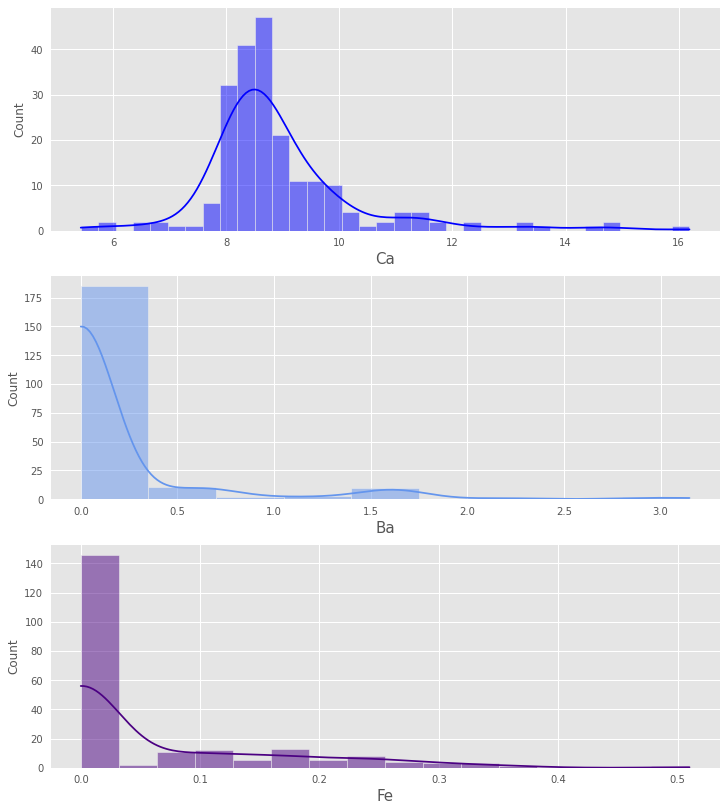

In [19]:
plt.style.use("ggplot")
fig, ax =plt.subplots(3,1, figsize=(12,14)) 


sns.histplot(x = data["Ca"], kde=True, ax=ax[0], color="blue");
ax[0].set_xlabel("Ca",fontsize=15);

sns.histplot(x = data["Ba"], kde=True, ax=ax[1], color="cornflowerblue");
ax[1].set_xlabel("Ba",fontsize=15);

sns.histplot(x = data["Fe"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("Fe",fontsize=15);


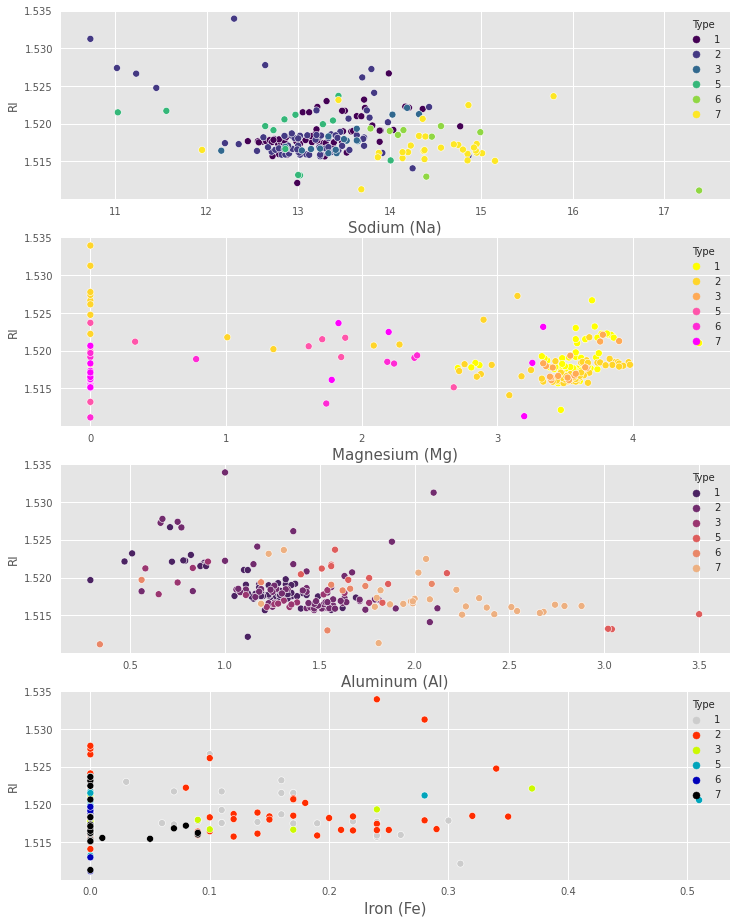

In [20]:
plt.style.use("ggplot")
fig, ax =plt.subplots(4,1, figsize=(12,16)) 

sns.scatterplot(x = data['Na'], y = data['RI'], hue = data['Type'], palette='viridis', legend=True, ax=ax[0])
ax[0].set_xlabel("Sodium (Na)",fontsize=15);

sns.scatterplot(x = data['Mg'], y = data['RI'], hue = data['Type'], palette='spring_r', legend=True, ax=ax[1])
ax[1].set_xlabel("Magnesium (Mg)",fontsize=15);

sns.scatterplot(x = data['Al'], y = data['RI'], hue = data['Type'], palette='flare_r', legend=True, ax=ax[2]);
ax[2].set_xlabel("Aluminum (Al)",fontsize=15);

sns.scatterplot(x = data['Fe'], y = data['RI'], hue = data['Type'], palette='nipy_spectral_r', legend=True, ax=ax[3]);
ax[3].set_xlabel("Iron (Fe)",fontsize=15);


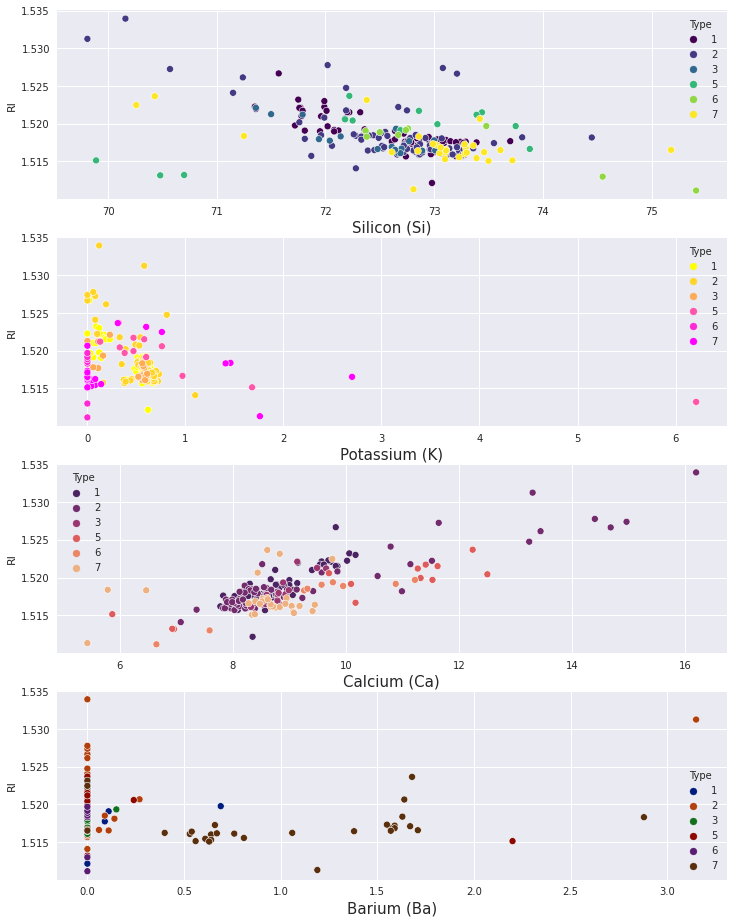

In [21]:
plt.style.use("seaborn")
fig, ax =plt.subplots(4,1, figsize=(12,16)) 

sns.scatterplot(x = data['Si'], y = data['RI'], hue = data['Type'], palette='viridis', legend=True, ax=ax[0])
ax[0].set_xlabel("Silicon (Si)",fontsize=15);

sns.scatterplot(x = data['K'], y = data['RI'], hue = data['Type'], palette='spring_r', legend=True, ax=ax[1])
ax[1].set_xlabel("Potassium (K)",fontsize=15);

sns.scatterplot(x = data['Ca'], y = data['RI'], hue = data['Type'], palette='flare_r', legend=True, ax=ax[2]);
ax[2].set_xlabel("Calcium (Ca)",fontsize=15);

sns.scatterplot(x = data['Ba'], y = data['RI'], hue = data['Type'], palette='dark', legend=True, ax=ax[3]);
ax[3].set_xlabel("Barium (Ba)",fontsize=15);


# **Splitting the data into training and test datasets**
 
Here, we are trying to predict the glass type using the given data. Hence, the Type will be the y label and rest of the data will be the X or the input data.



In [22]:

X = data.drop("Type", axis=1)
X.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [23]:
y=data["Type"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
len(X_train), len(X_test)


(149, 65)

# Model Building

# 1. Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
np.random.seed(42)
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [27]:
LinearRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)


Accuracy obtained by Linear Regression model: 76.64801283813273


# 2. DECISION TREE CLASSIFIER


In [28]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [29]:
DecisionTreeClassifierScore=dtree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)



Accuracy obtained by Decision Tree Classifier model: 66.15384615384615


# 3. Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [31]:

RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)


Accuracy obtained by Random Forest Classifier model: 75.38461538461539


# 4. Gradient Boosting Classifier


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [33]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)


Accuracy obtained by Gradient Boosting Classifier model: 80.0


# 5. ExtraTreesClassifier


In [34]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
etc.fit(X_train,y_train)


ExtraTreesClassifier(random_state=2)

In [35]:
ExtraTreesClassifierScore=etc.score(X_test,y_test)
print("Accuracy obtained by Extra Trees Classifier model:",ExtraTreesClassifierScore*100)


Accuracy obtained by Extra Trees Classifier model: 80.0


# 6. K Neighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [37]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)


Accuracy obtained by K Neighbors Classifier model: 60.0


# 7. CatBoost Classifier

In [38]:
from catboost import CatBoostClassifier
np.random.seed(42)
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);


Learning rate set to 0.5
0:	learn: 1.4233534	total: 53.2ms	remaining: 479ms
1:	learn: 1.1522712	total: 55.7ms	remaining: 223ms
2:	learn: 0.9846185	total: 58ms	remaining: 135ms
3:	learn: 0.8708312	total: 60.3ms	remaining: 90.5ms
4:	learn: 0.8096730	total: 62.6ms	remaining: 62.6ms
5:	learn: 0.7486508	total: 65ms	remaining: 43.3ms
6:	learn: 0.6821254	total: 67.3ms	remaining: 28.9ms
7:	learn: 0.6313458	total: 69.7ms	remaining: 17.4ms
8:	learn: 0.5730829	total: 72.1ms	remaining: 8.01ms
9:	learn: 0.5322829	total: 74.6ms	remaining: 0us


In [39]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)


Accuracy obtained by CatBoost Classifier model: 75.38461538461539


In [40]:
y_pred=gb.predict(X_test)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
...,...,...
5,1,2
135,2,2
56,1,1
199,7,7


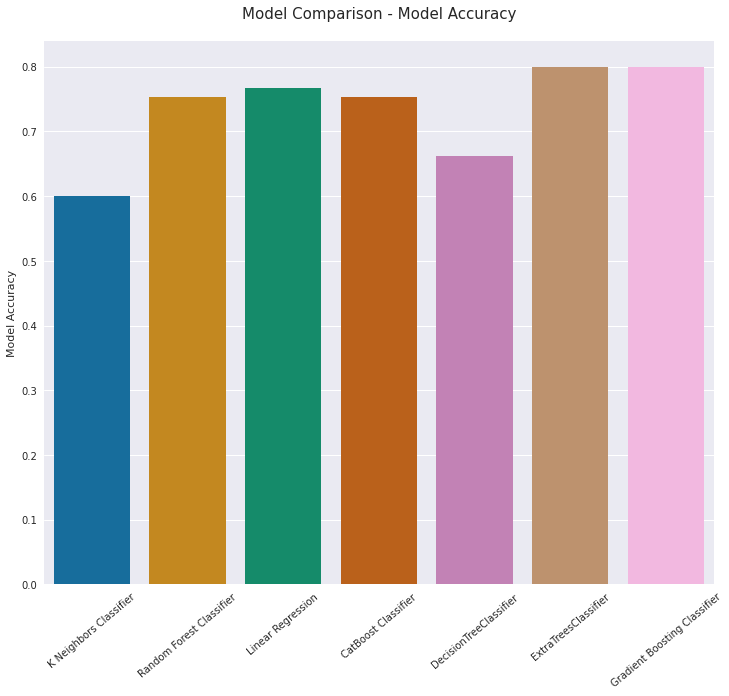

In [41]:
x = ["K Neighbors Classifier",
     "Random Forest Classifier",
     "Linear Regression",
     "CatBoost Classifier",
     "DecisionTreeClassifier",
     "ExtraTreesClassifier",
     "Gradient Boosting Classifier"]

y = [KNeighborsClassifierScore,
     RandomForestClassifierScore,
     LinearRegressionScore,
     CatBoostClassifierScore,
     DecisionTreeClassifierScore,
     ExtraTreesClassifierScore,
     GradientBoostingClassifierScore]

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x=x,y=y, palette="colorblind");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=15, y=1.03);


# CONCLUSION:

**Gradient Boosting Classifier and ExtraTreesClassifierScore gave us the best accuracy of about 81 % out of all models.**

# **Thank You**